# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time you run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### (1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

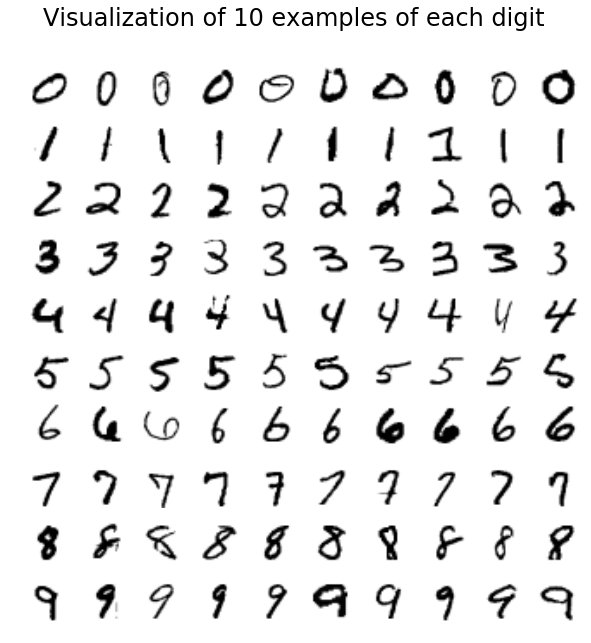

In [3]:
def P1(num_examples=10):
    
    ### STUDENT START ###
    # Set the colormap, gray_r gives us a clear background, gray gives a black background
    plt.rc('image', cmap='gray_r')

    # Establish the plot size
    fig = plt.figure(figsize=(10, 10))
    
    # Add the text/suptitle to figure
    fig.suptitle('Visualization of 10 examples of each digit', fontsize=24) 

    # Initialize a column variable, then count and plot 10 columns for each number
    column = 1

    # Walk through a list of 10 labels for each of the digits 0 - 9
    for digit in range(0, num_examples):
    
        # Select an index from mnist.target where the label is the chosen digist
        digitList = np.where (Y == digit)
    
        # Pick a set of digits that are deep in the list, randomly chosen
        # in the index range 900 - 910 for each digit
        for sample in (digitList[0][900:910]):
        
            # Set up a 10 by 10 plot grid
            plt.subplot(10, 10, column)

            # Resahpe each 784 pixel 1D number into a 28 by 28 2D grid
            digit = np.reshape(X[sample,:], newshape=(int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]))))

            # show the digits in the chosen column
            plt.imshow(digit)
        
            # turn off the printing of axes markers
            plt.axis('off')
            
        
            # Increment the column and display the next sample
            column += 1
    
    ### STUDENT END ###

P1(10)


### (2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

# REFERENCE: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# REFERENCE: https://www.datacamp.com/community/tutorials/the-importance-of-preprocessing-in-data-science-
# and-the-machine-learning-pipeline-iii-scaling-your-data-to-combat-noise#gs.GUmxoCY

    for k in k_values:
        # Create the knn object for neighbors of chosen number
        knn = KNeighborsClassifier(k)
        
        # Fit a model using the mini training set as training data and the mini
        # training labels as target values
        knnModel = knn.fit(mini_train_data, mini_train_labels)
        
        # The model has been fit
        # Now predict labels using the dev data and get the model score
        predDevLabels = knnModel.predict(dev_data)
        knnModelScore = knnModel.score(dev_data, dev_labels)
        
        # Report Accuracy for the dev data
        print('knn accuracy/score for training set, with {0:1d} neighbors : {1:6.4f} \n'.format(k, knnModelScore))
            
        # For k=1, show precision, recall, and F1 for each label. 
        if k == 1 or k == 3:
            print(classification_report(dev_labels, knnModel.predict(dev_data)))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

knn accuracy/score for training set, with 1 neighbors : 0.8880 

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

knn accuracy/score for training set, with 3 neighbors : 0.8780 

             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       

### ANSWER:  Which is the most difficult digit?**

With k_value = 1, digit 3 is accompanied by marginally higher precision and by lower recall as compared to the values for digit 9. However, the F1 score for 9 is the lowest at 0.80 indicating that 9 has the least harmonic mean value for Precision and Recall combined. Hence, 9 is the most difficult digit for k_value = 1. 

For k_value = 3, the digit 3 is accompanied by a significantly lower precision than 9 and ends up with a lower F1 score overall of 0.75. In this case, 3 becomes the most difficult digit based upon F1 value.

Overall, given the F1 score, 9 is the most difficult digit.

### (3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
### STUDENT START ###
def P3(train_sizes, accuracies):
    ### STUDENT START ###
    # Initialize an array of accuracy values 
    for size in train_sizes:
        
        # Create the knn model
        knn = KNeighborsClassifier(n_neighbors=1)
        
        # Partition and establish the test data for specified size
        XProb3, YProb3 = train_data[0:size], train_labels[0:size]
        
        # Fit model to the training data subset
        knnModel = knn.fit(XProb3, YProb3)
        
        # Start timer
        # Use the predictor on the dev data
        # Stop timer
        startTime = time.time()
        predDevLabels = knnModel.predict(dev_data)
        endTime = time.time()
        
        # Record accuracy and save in master list
        accuracy = knnModel.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        
        # Report dev set accuracy for various training set sizes.
        # Report the amount of time required to predict
        print("{0:2d} \t\t  {1:0.4f} \t {2:10.4f}" \
                            .format (size, accuracy, endTime - startTime))
        
    return
    ### STUDENT END ###

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []

# Pretty print the output headers
print("Training Size \tDev Accuracy \t Computation Time - seconds")

# Call the main routine
P3(train_sizes, accuracies)


Training Size 	Dev Accuracy 	 Computation Time - seconds
100 		  0.7200 	     0.1066
200 		  0.7860 	     0.2328
400 		  0.8410 	     0.4368
800 		  0.8840 	     0.9679
1600 		  0.9020 	     2.2879
3200 		  0.9260 	     4.1103
6400 		  0.9370 	     8.2924
12800 		  0.9590 	    16.4826
25000 		  0.9700 	    32.6471


### (4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

The 60K Predicted value is :    2.32386 : Appears to be a bogus value
The 60K Logit Predicted value is :    0.99882


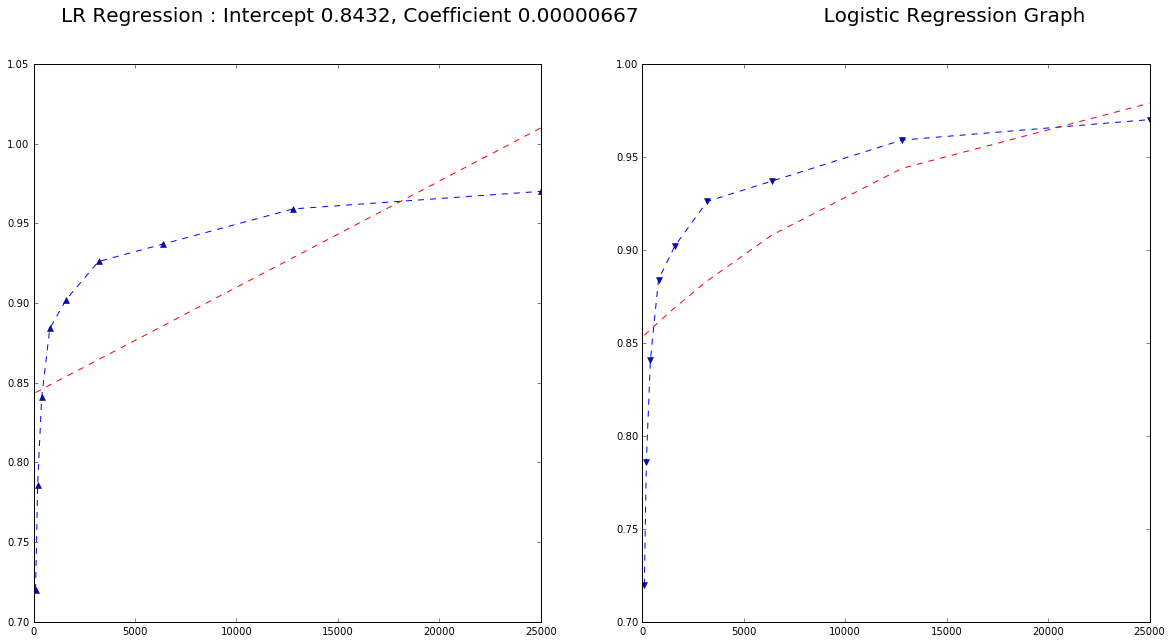

In [8]:
### STUDENT START ###
def P4(sizes, accuracies):
    ### STUDENT START ###
    
    def dataSetUp ( sizes, accuracies):
        # Convert inputs into arrays so that transpose operation can be called
        train_sizes = np.array([sizes])
        accuracies = np.array(accuracies)
        
        # Transpose the input arrays 
        vector_train_sizes = train_sizes.T
        vector_accuracies = accuracies.T
        
        # return the transposed arrays
        return vector_train_sizes, vector_accuracies 
        
    # set up the vector data
    vector_train_sizes, vector_accuracies  = dataSetUp(sizes, accuracies)
    
    # Create a linear regression model:
    lrModel = LinearRegression()
    lrModel = lrModel.fit(X=vector_train_sizes,y=vector_accuracies)
    
    # Predict
    LRPrediction = lrModel.predict(vector_train_sizes)

    fig1 = plt.figure(figsize=(20,10))
    Ax1=fig1.add_subplot(1, 2, 1)
    Ax1.plot(vector_train_sizes, vector_accuracies,  "--b^",  vector_train_sizes, LRPrediction, "--r")

    fig1.suptitle('LR Regression : Intercept {0:6.4f}, Coefficient {1:10.8f}     \
                        Logistic Regression Graph'. \
                  format(float(lrModel.intercept_), float(lrModel.coef_)), fontsize=20) 
    
    # predict for 60000
    sixtyK_LRPrediction = lrModel.predict(np.log(60000))
    print('The 60K Predicted value is : {0:10.5f} : Appears to be a bogus value' \
                                  .format(float(np.exp(sixtyK_LRPrediction))))

    # Reset and create a new model just to be sure
    lrModel = LinearRegression()
    lrModel = lrModel.fit(X=vector_train_sizes,y=accuracies)
    
    # Transform accuracies into logit and fit
    logit = np.log(vector_accuracies / (1 - vector_accuracies))
    lrModelFit = lrModel.fit(vector_train_sizes, logit)
    
    #Using the exponential formula, do the prediction
    logitPrediction = 1 / (1 + np.exp(-lrModel.predict(vector_train_sizes)))
    
    # Plot the fit
    fig2 = plt.figure(2)
    Ax2=fig1.add_subplot(1, 2, 2)
    Ax2.plot(vector_train_sizes, vector_accuracies, "--bv", vector_train_sizes, logitPrediction, "--r")
    fig2.suptitle('Logit Regression Graph', fontsize=20)
    
    # predict for 60000
    sixtyK_LRPrediction = 1 / (1 + np.exp(-lrModel.predict(60000)))
    print('The 60K Logit Predicted value is : {0:10.5f}'.format(float(sixtyK_LRPrediction)))

### STUDENT END ###

P4(train_sizes, accuracies)

ANSWER: 
#### What does it predict for n=60000? 
The predicton with linear regression with no transformation for n = 60000 is 2.32386.  This is a bogus value, needs to be less than 1.

#### What's wrong with using regression here? 
The prediction with Linear Regression appears to be a bogus value because the fitted line is ramping straight up while the actual curve appears be leveling off. The assumption of linear relationship is wrong.

#### Can you apply a transformation that makes the predictions more reasonable? 
Per what has been learned in class, the Logit regression is the appropriate method. The predicted value for 60000 is 0.99882 which is below 1 and hence is acceptable as a valid value.

### (5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

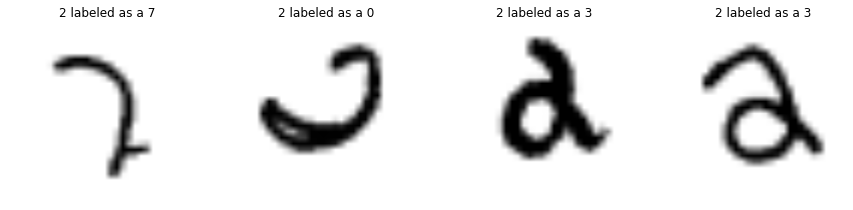

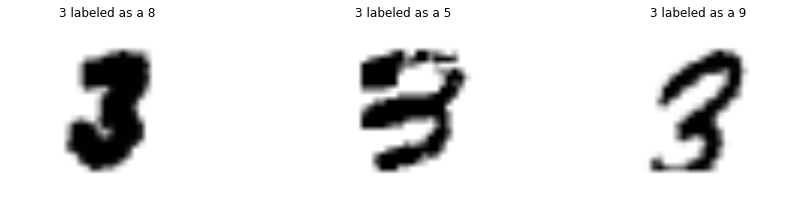

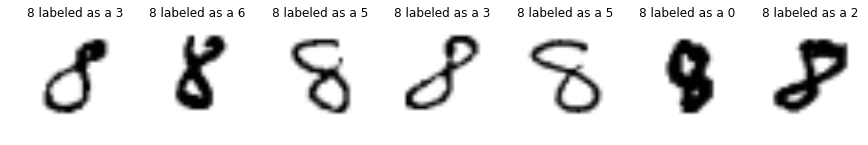

In [9]:
def P5(test_label):
    def P5_KNNModel():
        ### STUDENT START ###
        # Create the KNN object
        knn = KNeighborsClassifier(n_neighbors=1)
    
        # fit a KNearestNeighbor model
        knn.fit(train_data, train_labels)
    
        # Predict using the model
        pred_labels = knn.predict(dev_data)
    
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
        # Generate the confusion matrix for dev data
        cm = confusion_matrix(y_pred=pred_labels,y_true=dev_labels)
    
        # return the KNobjFit since we'll use that to print out examples of confused digits...
        return pred_labels

    pred_labels=P5_KNNModel()

    # Let's work with a digit that we wish to assess confusion of. 
    # This digit has been passed in via the main function
    # First find all instances on the selected digit in dev_labels
    orig_label = np.where(dev_labels == test_label) 

    # For the selected digit, determine the dev labels and the predicted labels
    devLabels = dev_labels[orig_label]
    predLabels = pred_labels[orig_label]

    # Find every instance of a mismatch between the dev label and the
    # preducted label for the selected digit and narrow down to just 
    # the mismatched indices
    mismatchList = (devLabels != predLabels)
    mismatch = np.where(mismatchList != False)

    # Using the mismatch indices, map back to the original label list
    # so that data for plotting can be selected
    origTableMismatch = orig_label[0][mismatch]

    # Start plot
    plt.figure(figsize=(15,3))
    
    # Max out at 8 plots per row. Gets crowded otherwise
    # Too many to plot, limit to a number of 8
    if len(origTableMismatch) > 8:
        plots = 8
    else:
        # If less than 8 available, plot them all
        plots = len(origTableMismatch)
    
    # Start plotting with column 1
    column = 1
    
    # Loop through  all plots
    for plotCount in range(0, plots):

        Ax=plt.subplot(1, plots, plotCount + 1)
   
        digitShow = np.reshape(dev_data[origTableMismatch[plotCount]], \
                               newshape=(int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]))))
        # plot parameters
        plt.imshow(digitShow)
        plt.axis('off')
        plt.title('{0:1d} labeled as a {1:1d}'.format(test_label, int(pred_labels[origTableMismatch][plotCount])))
    
        # Increment the column and display the next sample
        column += 1
        
### STUDENT END ###

# test 3 cases using a defined label. 2, 3, and 8 are tested here
P5(test_label = 2)

P5(test_label = 3)

P5(test_label = 8)

### (6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [ ]:
#create a new array to store our blurred values. TO DELETE - this has the same number rows, which are images
    new_array = np.zeros(original_data.shape)
    
    #reshape input array to 28 x 28 shape
    #original_image = original_image.reshape(28,28)
    
    #iterate through each row (image) in the input data set
    for image in original_data:
        
        #reshape the image to a 28x28 pixel grid
        
        image = image.reshape(28,28)
        print(image.shape)
        new_image = np.zeros(image.shape)   
        
        for(x,y), v in np.ndenumerate(image):  #I'm getting stuck here. I'm close but can't get the loop to work
            if x == 0:
                square= 0
            if y == 0:
                square =0
            square =image[x-1:x+2, y-1:y+2]
            print(square.shape)
            new_pixel = sum(square*(weights_norm))
            new_image[x,y] = new_pixel
            
        new_image = new_image.reshape(784,1)
        new_array[x,:] = new_image    # Define x as integer indicating the number of the image
         
            

In [10]:
def P6():
    
### STUDENT START ###
    
    def blur_native(data):
        
        # Walk through all data points in the data
        for sample in range(0, data.shape[0]):
            
            # Reshape each point into a 28 x 28 set
            digits = np.reshape(data[sample, :], newshape=(int(np.sqrt(784)),int(np.sqrt(784))))

            # For every pixel in 28 x 28, weight according  to neighbor pixels
            # ASSUMPTIONS:
            # 1. Avoid manipulating the border pixels. They are too far to the periphery
            # 2. Allow most weight to central pixel value. 0.6  (0.4 remains unallocated) in this case
            # 3. For all border pixels, assign an equal weight (0.05) withn the remaining 0.4
            for ypixel in range(0, 28):
                for xpixel in range(0, 28):
                    
                    # avoid the border pixels
                    if xpixel >= 27 or ypixel >= 27:
                        break
                    else:
                        # create a new pixel value by weighted addition, weight = 0.05
                        digits[xpixel][ypixel]= (digits[xpixel][ypixel]) * 0.6 + \
                                        (digits[xpixel + 1][ypixel]) * 0.05 + \
                                        (digits[xpixel + 1][ypixel + 1]) * 0.05 + \
                                        (digits[xpixel][ypixel + 1]) * 0.05 + \
                                        (digits[xpixel - 1][ypixel + 1]) * 0.05 + \
                                        (digits[xpixel - 1][ypixel]) * 0.05 + \
                                        (digits[xpixel - 1][ypixel - 1]) * 0.05 + \
                                        (digits[xpixel][ypixel - 1]) * 0.05 + \
                                        (digits[xpixel + 1][ypixel - 1]) * 0.05
                                        
                        # New pixel vales are set, now reshape back to original shape
                        data[sample] = np.reshape(digits, newshape=(1,784))
        # return the reformulated data
        return data

    
    # Native method: 
    # ==============
    
    # CASE I : Blurred Train data
    blurred_train_data = blur_native(mini_train_data)
    knn_blur = KNeighborsClassifier(n_neighbors=1)
    knn_blur.fit(blurred_train_data, mini_train_labels)
    # Compute the mean accuracy on the given test data and labels.
    score = knn_blur.score(dev_data, dev_labels)
    print('\nNative weighted method: The score when only the training data is blurred : {}'.format(score))
    
    # CASE II : Blurred Dev data
    blurred_dev_data = blur_native(dev_data)
    #knn_blur = KNeighborsClassifier(n_neighbors=1)
    knn_blur.fit(mini_train_data, mini_train_labels)
    # Compute the mean accuracy on the given test data and labels.
    score = knn_blur.score(blurred_dev_data, dev_labels)
    print('\nNative wighted method: The score when only the dev data is blurred : {}'.format(score))
    
    # CASE III : Blurred Train and Dev data
    #knn_blur = KNeighborsClassifier(n_neighbors=1)
    knn_blur.fit(blurred_train_data, mini_train_labels)
    score = knn_blur.score(blurred_dev_data, dev_labels)
    print('\nNative weighted method: The score when both training data and dev data are blurred : {}'.format(score))
    
    
    # scipy.ndimage.filters method: 
    # =============================
    from scipy.ndimage.filters import gaussian_filter
    def blur_data(dataset):
        blurred = gaussian_filter(dataset, sigma = 1)
        return blurred

    # CASE I : Blurred Train data
    blurred_train_data = blur_data(mini_train_data)
    knn_blur = KNeighborsClassifier(n_neighbors=1)
    knn_blur.fit(blurred_train_data, mini_train_labels)
    # Compute the mean accuracy on the given test data and labels.
    score = knn_blur.score(dev_data,dev_labels)
    print('\nscipy.ndimage.filters method: The score when only the training data is blurred : {}'.format(score))
    
    # CASE II : Blurred Dev data
    blurred_dev_data = blur_data(dev_data)
    knn_blur = KNeighborsClassifier(n_neighbors=1)
    knn_blur.fit(mini_train_data, mini_train_labels)
    score = knn_blur.score(blurred_dev_data, dev_labels)
    print('\nscipy.ndimage.filters method: The score when only the dev data is blurred : {}'.format(score))
    
    # CASE III : Blurred Train and Dev data
    knn_blur = KNeighborsClassifier(n_neighbors=1)
    knn_blur.fit(blurred_train_data, mini_train_labels)
    score = knn_blur.score(blurred_dev_data, dev_labels)
    print('\nscipy.ndimage.filters method: The score when both training data and dev data are blurred : {}'.format(score))

        
### STUDENT END ###


P6()


Native weighted method: The score when only the training data is blurred : 0.903

Native wighted method: The score when only the dev data is blurred : 0.901

Native weighted method: The score when both training data and dev data are blurred : 0.901

scipy.ndimage.filters method: The score when only the training data is blurred : 0.764

scipy.ndimage.filters method: The score when only the dev data is blurred : 0.569

scipy.ndimage.filters method: The score when both training data and dev data are blurred : 0.471


### ANSWER: (Using mini_train_data to do the comparison because train_data takes too long to run)
### Also, resulting numbers vary slightly between runs


#### Weighted Method

Weighted method: The score when only the training data is blurred : 0.903

Weighted method: The score when only the dev data is blurred : 0.901

Weighted method: The score when both training data and dev data are blurred : 0.901


#### scipy method

scipy.ndimage.filters method: The score when only the training data is blurred : 0.764

scipy.ndimage.filters method: The score when only the dev data is blurred : 0.569

scipy.ndimage.filters method: The score when both training data and dev data are blurred : 0.471

### (7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [11]:

def P7():
### STUDENT START ###

    # From week 3 workbook
    # Define a function that applies a threshold at 0.5
    def binarize_data(data, thresholds= 0.5):
        # Initialize a new feature array with the same shape as the original data.
        binarized_data = np.zeros(data.shape)
    
        # Define the needed bins, two in this case
        bins = [thresholds]
    
        # segment the data
        binarized_data = np.digitize(data, bins)
    
        return binarized_data


    # Extended from week 3 workbook
    # Define a function that applies a user defined threshold
    # values 0, 1, 2
    def trisegment_data(data, thresholds= [0.333, 0.667]):

        # Initialize a new feature array with the same shape as the original data.
        trisegment_data = np.zeros(data.shape)
    
         # Define the needed bins, three in this case
        bins = np.array(thresholds)
    
        # segment the data
        trisegment_data = np.digitize(data, bins)
    
        return trisegment_data


    # Create the Bernoulli Model for the Binary classification 
    # Binarize and fit
    BernNBModel = BernoulliNB(binarize=0.5)
    BNtrain_data = binarize_data(train_data)
    BernNBModel.fit(BNtrain_data, train_labels)
    
    # Print the accuracy
    print ('Bernoulli Naive Bayes accuracy: %3.2f' %BernNBModel.score(dev_data, dev_labels))
    print("\n\n")
    
    
    # Create the MultinomialNB Model
    # Create the bins and fit
    MultNBModel = MultinomialNB(class_prior=None, fit_prior=True)
    MultNBtrain_data = trisegment_data(train_data)
    MultNBModel.fit(MultNBtrain_data, train_labels)
    
    # Just to test, try the MultinomialNB over multiple segmentations
    thresholds = ([0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.33, 0.66], [0.4, 0.6])
                       
    # Loop through the test segments
    for threshold in thresholds:
        Tert_devdata = trisegment_data(dev_data, threshold) 
        
        #### Report results with 3-level data feature values
        print ('Multinomial Naive Bayes accuracy: {} for levels of {}'. \
                   format(MultNBModel.score(Tert_devdata, dev_labels), threshold))
        
    ### STUDENT END ###

P7()


Bernoulli Naive Bayes accuracy: 0.83



Multinomial Naive Bayes accuracy: 0.811 for levels of [0.1, 0.9]
Multinomial Naive Bayes accuracy: 0.822 for levels of [0.2, 0.8]
Multinomial Naive Bayes accuracy: 0.821 for levels of [0.3, 0.7]
Multinomial Naive Bayes accuracy: 0.829 for levels of [0.33, 0.66]
Multinomial Naive Bayes accuracy: 0.821 for levels of [0.4, 0.6]


#### ANSWER: 
With every test case, the multiclass multinomial NB shows an accuracy level that is less than that shown by the Bernoulli NB and so does not improve the results. 

Use of accuracy threshold bands reduce the amount of available information for decision making by segmenting the data. This loss of information, particularly with the representation of graphical data, appears to the cause of the reduction in accuracy. Each data point or pixel is a subset of a digit and is also a grey shade and so the value of segmenting graphical data is not valuable particularly given the observed lack of increase in accuracy.

### (8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
def P8(alphas):

    ### STUDENT START ###
    # Create the Bernoulli Model
    BernNBModel = BernoulliNB(binarize = 0.5)
    
    # Reference: https://github.com/ericwhyne/kaggle_random_acts_of_pizza/blob/master/james_route.ipynb
    GridModel = GridSearchCV(BernNBModel, alphas)
    
    GridModel.fit(mini_train_data, mini_train_labels)
    return GridModel

    ### STUDENT END ###

alphas = {'alpha': [0.00000000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

#print (nb.grid_scores_)
for params, mean_score, scores in nb.grid_scores_: print("Scores with mean value of %0.3f for %r"
              % (mean_score, params))
print ('\nThe best value of alpha is : {}'.format(nb.best_params_))

Scores with mean value of 0.793 for {'alpha': 1e-11}
Scores with mean value of 0.812 for {'alpha': 0.0001}
Scores with mean value of 0.814 for {'alpha': 0.001}
Scores with mean value of 0.816 for {'alpha': 0.01}
Scores with mean value of 0.809 for {'alpha': 0.1}
Scores with mean value of 0.795 for {'alpha': 0.5}
Scores with mean value of 0.789 for {'alpha': 1.0}
Scores with mean value of 0.781 for {'alpha': 2.0}
Scores with mean value of 0.712 for {'alpha': 10.0}

The best value of alpha is : {'alpha': 0.01}


### ANSWER:
Accuracy with alpha = 0 is 0.801 for (NOTE: rather than 0, I used a value of 1e-11 to keep python from complaining about a divide by zero}. 

The intention of smoothing is to assign probabilities to values that have not been seen. By setting alpha as zero, unseen values are not being accounted for, leading to a model that does not predict well. This is as expected.


Scores with mean value of 0.812 for {'alpha': 0.0001}

Scores with mean value of 0.814 for {'alpha': 0.001}

Scores with mean value of 0.816 for {'alpha': 0.01}

Scores with mean value of 0.809 for {'alpha': 0.1}

Scores with mean value of 0.795 for {'alpha': 0.5}

Scores with mean value of 0.789 for {'alpha': 1.0}

Scores with mean value of .781 for {'alpha': 2.0}

Scores with mean value of 0.712 for {'alpha': 10.0}


### (9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [13]:
def P9():

### STUDENT START ###

    def P9_GNB(data):
        # Create a GaussianNB object
        # fit and evaluate
        GaussNBModel = GaussianNB()
        GaussNBModel.fit(data, train_labels)
        GNBScore = GaussNBModel.score(dev_data, dev_labels)
    
        return GaussNBModel, GNBScore

    # Run model to assess with train_data
    gnbModel, gnb = P9_GNB(train_data)
    # print out values for  the digit 3
    print('The unmodified model score is {}'.format(gnb))

    # Modify data and run model to assess with modified mini_train_data (noise added)
    modified_train_data = train_data + np.random.randn(len(train_data), 784) * 0.14
    gnbModel, gnb = P9_GNB(modified_train_data)
    print('Fix option 1: The model score with noise-added training data is {}'.format(gnb))
    
    # Per Todd's advice at his Office hour 
    # Modify data and run model to assess with SD forced to be 1
    gnbModel.sigma_ = np.ones_like(gnbModel.sigma_)
    gnbPred = gnbModel.predict(dev_data)
    
    # Find the True/False entries where the labels match or do not match the predictions
    mismatchList = (dev_labels != gnbPred)
    
    # Narrow down to just the False entries
    mismatch = np.where(mismatchList != False)
    
    # Find the number of False entries
    # Compute an accuracy over the entire dev data length
    mismatchCount = len(mismatch[0][:])
    
    print('Fix option 2: The accuracy after the sigma has been forced to 1 is {}'.format(1- (mismatchCount/len(dev_data))))
    
    # Todd Suggestion
    # gnb.sigma_[digit][f] =

### STUDENT END ###

gnb = P9()

The unmodified model score is 0.558
Fix option 1: The model score with noise-added training data is 0.786
Fix option 2: The accuracy after the sigma has been forced to 1 is 0.8069999999999999


### [9] Notes

The unmodified model score is 0.621. As pointed out, the model does not work well because the accuracy is low. 

Two fixes were attempted and each provided better results. 

Fix option # 1. Add random noise to data. The model score with noise-added training data is 0.791. I tied this intuitively before trying the next formal solution of modifying the SD. The approach of forcing noise improved the score significantly to 0.787

Fix option #2. Diagnosed the problem with advice that Todd gave at his office hour discussion. The Standard deviation is far from 1. Force it to be 1. The accuracy after the sigma has been forced to 1 is 0.804

### (10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

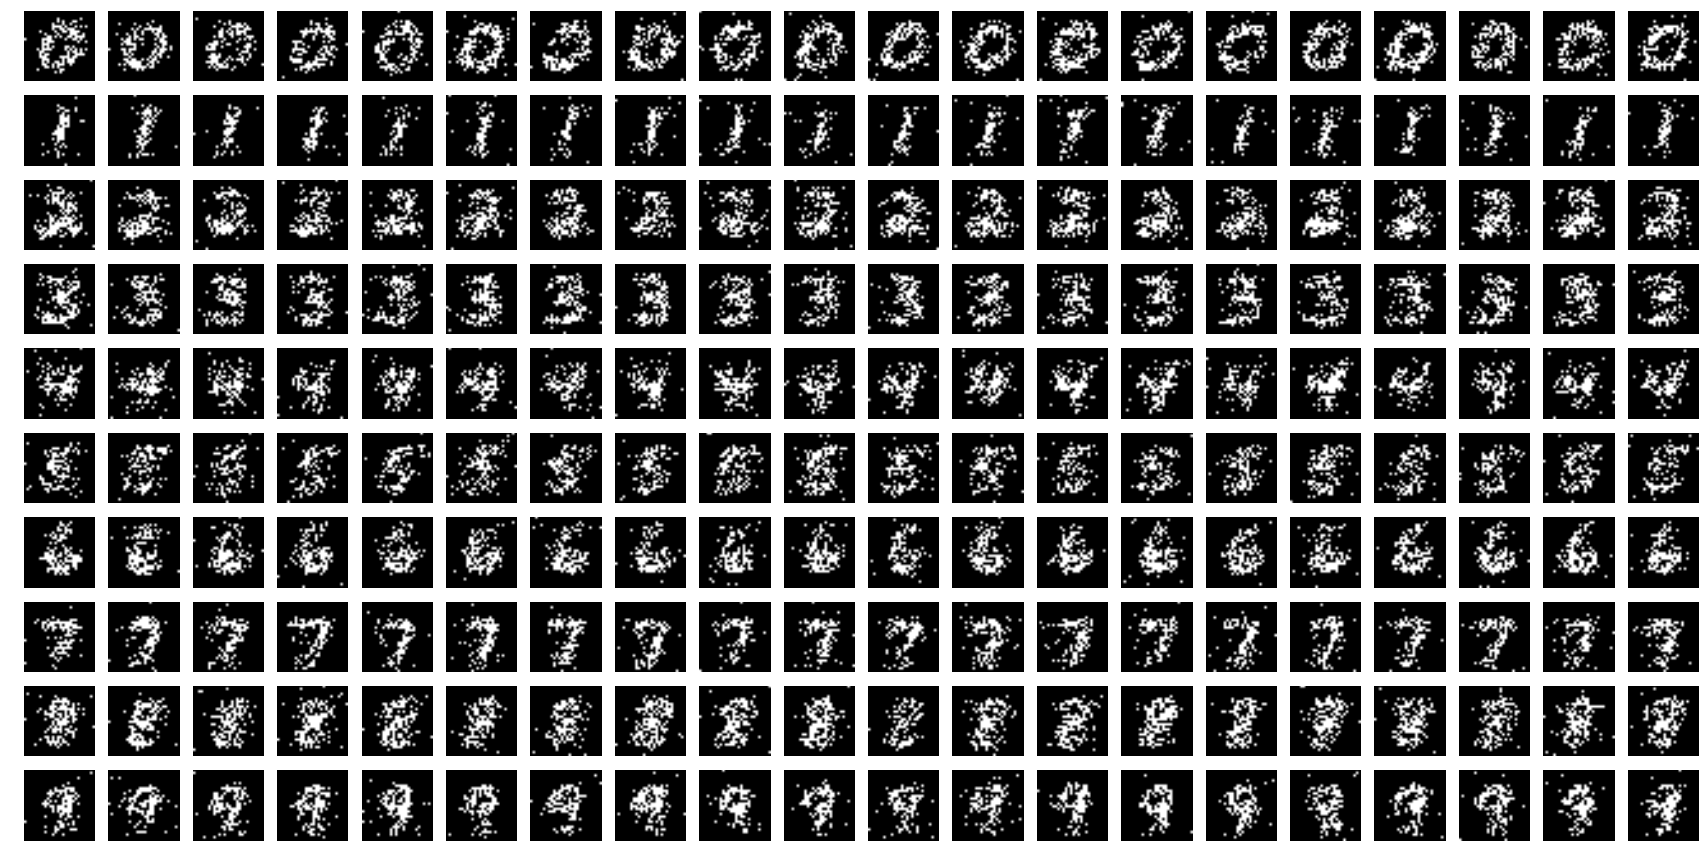

In [14]:
def P10(num_examples):
    
### STUDENT START ###
    # Generate the model, fit
    BernNBModel = BernoulliNB(alpha=1, binarize=0.5)
    BernNBModel.fit(mini_train_data, mini_train_labels)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    # Get the Empirical log probability of features given a class, P(x_i|y).
    Prob = np.exp(BernNBModel.feature_log_prob_)
    
    plt.figure(figsize=(30, 30))
    
    column = 1
    MatchList = []
    dimy = 784
    
    for digit in range(0,10):
        Match = np.where(dev_labels == digit)
        #XXX  = dev_labels[np.where(dev_labels == digit)]
        MatchList.append(Match)
        
    plt.rc('image',cmap='gray_r')
    
    ### Looop over digits from 0 to 9
    for digit in range(0,10,1):
        
        for i in range(0, num_examples):

            # Set up sun plot colors and grid size, start with column 1
            plt.rc('image', cmap='gray_r')
            Ax=plt.subplot(20, 20, column)

            # TWO EXAMPLES tested
            # One with direct comparison
            # Second with a less stringent comparison (not executed or displayed)
            example1 = np.random.rand(dimy) > (Prob[digit])
            #example2= np.random.rand(dimy) > ((Prob[digit]) * 0.15) # Use at a later time

    
            PlotMatrix=np.reshape(example1,newshape=(int(np.sqrt(dimy)), int(np.sqrt(dimy))))
            plt.imshow(PlotMatrix)
            
            # The less stringent plot is not displayed, will be used at a later time
            # PlotMatrix=np.reshape(example2,newshape=(int(np.sqrt(dimy)), int(np.sqrt(dimy))))
            # plt.imshow(PlotMatrix)
            
            plt.axis('off') # don;t need exis markers
            column += 1 # Show the next column
            
            
    plt.show()

### STUDENT END ###

P10(20)

### ANSWER:

The basic shape and form are clearly visible and the digits can be almost distinguished. Further filtering and smoothing action can establish clearer images.

### (11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [15]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

def P11(buckets, correct, total):

    # Bernoulli Model. Fit and predict
    # From Problem 8 we alreadyt know that alpha = 0.01 offers the best results
    BernNBModel = BernoulliNB(alpha=0.01, binarize  = 0.5)
    BernNBModel.fit(train_data, train_labels)
    
    # Extract the predicted class and the probabilities
    predicted_class = BernNBModel.predict(dev_data)
    predicted_probs = BernNBModel.predict_proba(dev_data)
    
    # In each predicted class...
    for i in range(len(predicted_class)):

        # Find the maximum p value
        max_p = max(predicted_probs[i])
        
        # Compare the maximum p value against the buckets list
        # add 1 to every value in the bucket that is above the max probability value
        truth_count = sum(max_p > buckets)

        # If the predicted class matches the original label, the 
        # prediction is correct. Call it the "truth" and increment 
        if predicted_class[i] == dev_labels[i]:
            correct[truth_count] = 1
        
        # Increment the truth count
        total[truth_count] += 1
    
    return (correct, total)


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

                
### STUDENT END ###

p(pred) <= 0.5000000000000    total =   2    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  52    accuracy = 0.019
p(pred) <= 0.9990000000000    total =  97    accuracy = 0.010
p(pred) <= 0.9999900000000    total =  66    accuracy = 0.015
p(pred) <= 0.9999999000000    total =  74    accuracy = 0.014
p(pred) <= 0.9999999990000    total =  77    accuracy = 0.013
p(pred) <= 0.9999999999900    total =  67    accuracy = 0.015
p(pred) <= 0.9999999999999    total =  77    accuracy = 0.013
p(pred) <= 1.0000000000000    total = 488    accuracy = 0.002


### ANSWER:

#### Note: I needed a lot of thinking help on this problem 11 and borrowed algorithm ideas from many discussions and external sources. The code is mine but it took a while to structure to the mechanics

This appears to be a a strongly calibrated classifier because it fits the rule of being rougly 90% accurate when the posterior probability of the predicted class is 0.9. The data above shows that at a probability level of 0,9, the accuracy is 0.967

### (12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [16]:
def P12():

### STUDENT START ###

    def sum_data(data):
        
        #print(data.shape)
        # Initialize a new feature array with the same shape as the original data.
        newData = np.zeros(data.shape)
        entry = np.zeros((1000, 28, 28))
        rowSum = np.zeros((1000, 28))
        colSum = np.zeros((1000, 28))

        #print(rowSum.shape)
        #print(colSum.shape)
    
        # Walk through all data points in the data
        for sample in range(0, data.shape[0]):
            
            # Reshape each point into a 28 x 28 set
            entry[sample] = np.reshape(data[sample, :], newshape=(int(np.sqrt(784)),int(np.sqrt(784))))
                
            # For every pixel in 28 x 28, add rows and columns
            # First do the row additions, while holding column value constant
            for colCount in range(0, 28):
                for rowCount in range(0, 28):
                    rowSum[sample][colCount] += entry[sample][rowCount][colCount]
            
            # Next do the column additions, while holding row value constant
            for rowCount in range(0, 28):
                for colCount in range(0, 28):
                    colSum[sample][colCount] += entry[sample][rowCount][colCount]
        
        # Combine the row and column additions
        newData = np.hstack((rowSum, colSum))
                                 
        # return the reformulated data
        return newData

    aggregated_test_data = sum_data(mini_train_data)
    aggregated_dev_data = sum_data(dev_data)
    

    # Bernoulli Model. Fit and predict
    # From Problem 8 we already know that alpha = 0.01 offers the best results
    BernNBModel = BernoulliNB(alpha=0.01, binarize  = 0.5)
    BernNBModel.fit(aggregated_test_data, mini_train_labels)
    # Print the accuracy
    print ('Bernoulli Naive Bayes accuracy for row/column aggregated test data: {0:3.2f}'. \
                       format(BernNBModel.score(aggregated_test_data, mini_train_labels)))
    print ('Bernoulli Naive Bayes accuracy for row/column aggregated dev data: {0:3.2f}'. \
                       format(BernNBModel.score(aggregated_dev_data, dev_labels)))


### STUDENT END ###

P12()

Bernoulli Naive Bayes accuracy for row/column aggregated test data: 0.30
Bernoulli Naive Bayes accuracy for row/column aggregated dev data: 0.31


### Answer

Code is complete and functional but performance seems to show low levels. The summation of rows and columns has resulted in a massive loss of information. Pretty sure that this low performance is not a coding error (does not overtly appear to be) or whether this is a real manifestation.